<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

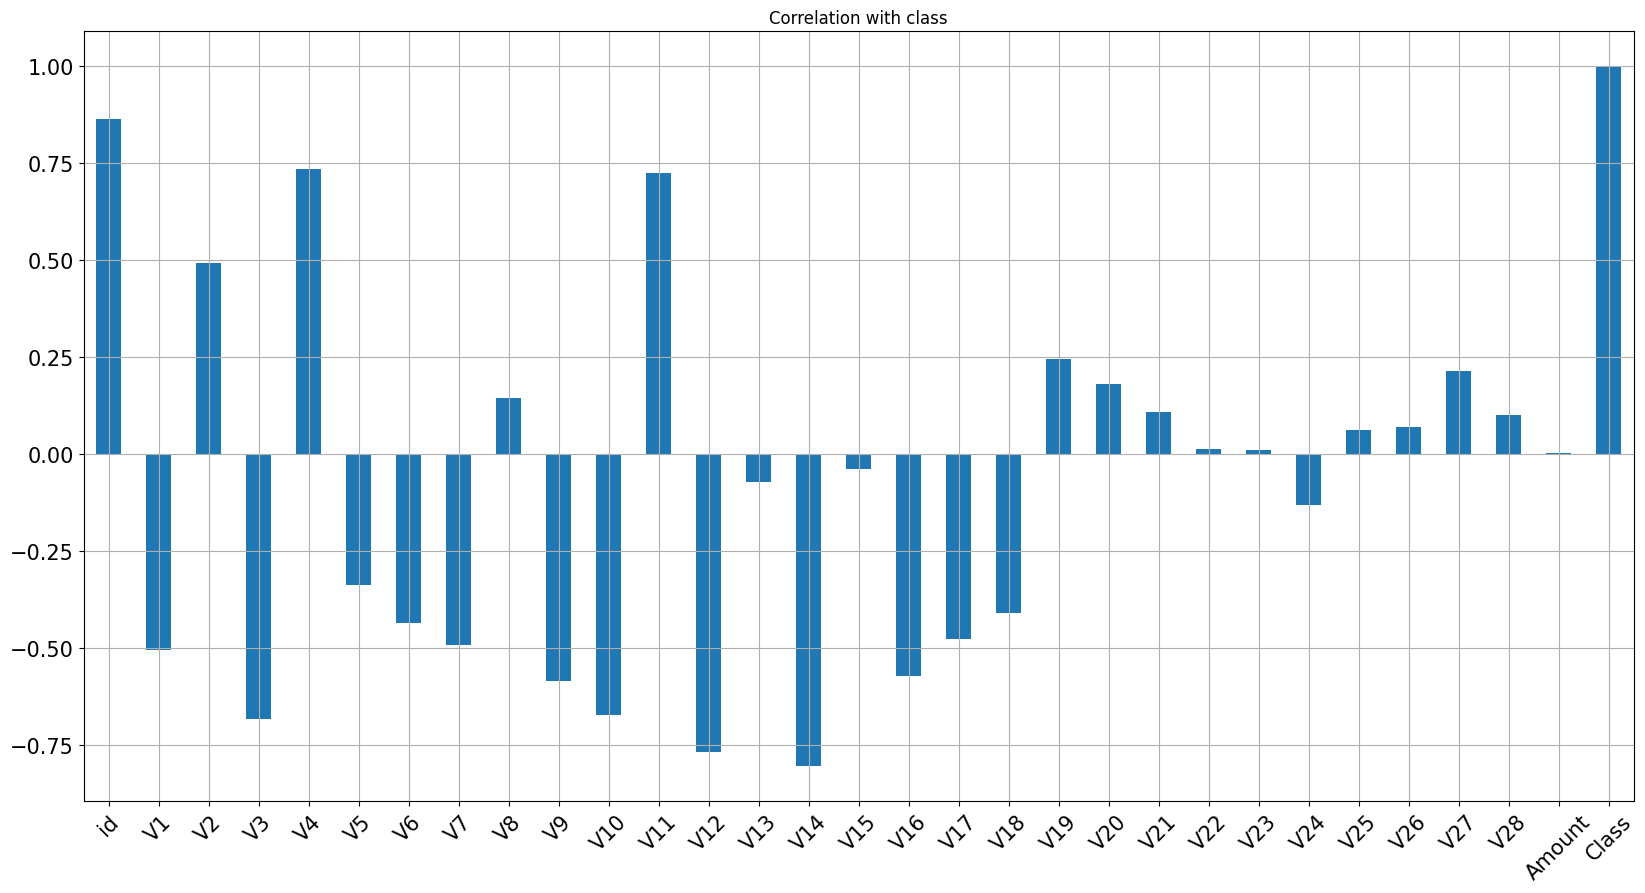

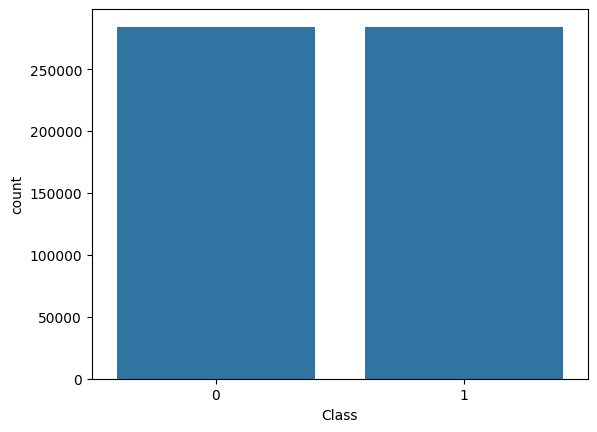

Accuracy KNN: 0.9964212229393454
Precision KNN: 0.9930479326747165
Recall KNN: 0.9998596540472264
F1 Score KNN: 0.9964421521919664
Accuracy RF: 0.9831788685085204
Precision RF: 0.9976512674122388
Recall RF: 0.9687203957755868
F1 Score RF: 0.9829730042456231
Accuracy LR: 0.9613896558394738
Precision LR: 0.9818298378972433
Recall LR: 0.9403705133153223
512


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch: 0 	Training_loss: 0.001354
Epoch: 1 	Training_loss: 0.001352
Epoch: 2 	Training_loss: 0.001349
Epoch: 3 	Training_loss: 0.001343
Epoch: 4 	Training_loss: 0.001337
Epoch: 5 	Training_loss: 0.001323
Epoch: 6 	Training_loss: 0.001304
Epoch: 7 	Training_loss: 0.001286
Epoch: 8 	Training_loss: 0.001263
Epoch: 9 	Training_loss: 0.001236
Accuracy score: 0.9073474843043807
Precision score: 0.999462538965925


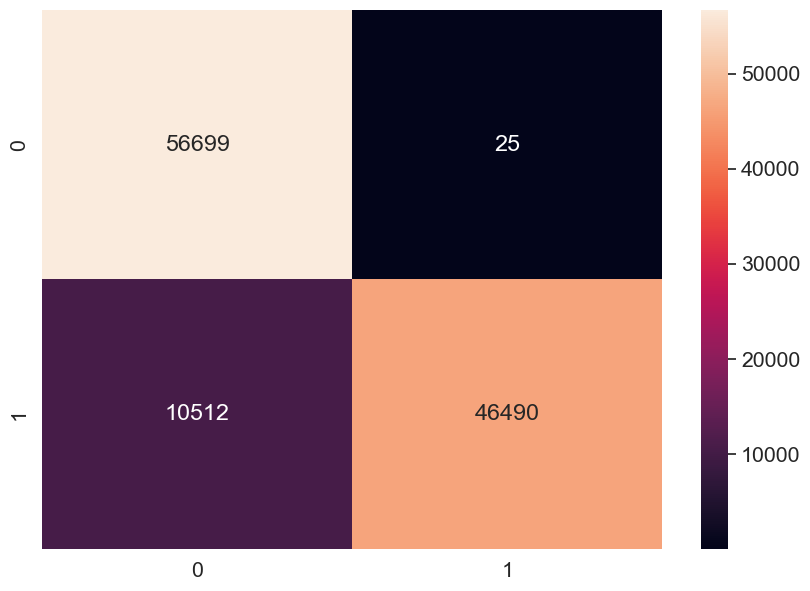

Fraud


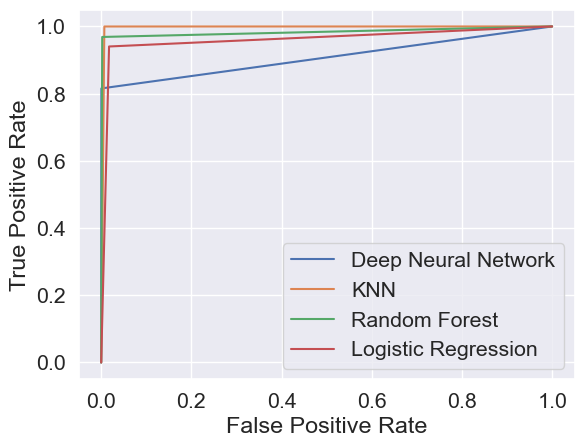

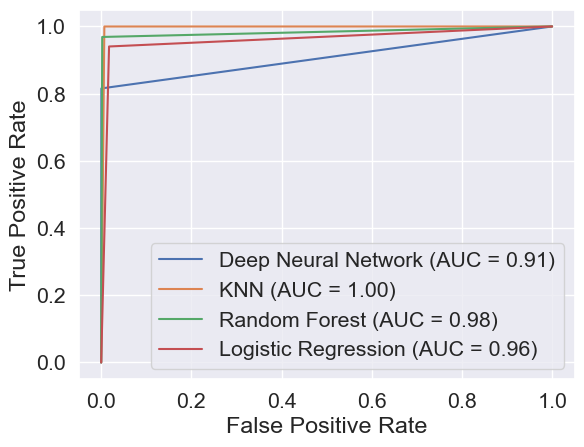

In [2]:
%run model.ipynb

In [3]:
def pred(str):
    list=[]
    for i in str.split(','):
        list.append(float(i))
    result = model(torch.tensor(list).float()).detach().numpy()
    result [result>=0.5] =1.0
    result [result<0.5] =0.0
    if result>0.5:
        return 'Fraud'
    else:
        return 'Not Fraud'

In [4]:
# from flask import Flask,render_template,request,jsonify

# app= Flask(__name__)

# @app.route('/', methods=['GET', 'POST'])
# def homepage():
#     return render_template('index.html')

# @app.route('/review', methods=['POST'])
# def index():
#     if (request.method == 'POST'):
#         str = request.form['content']
#         result=pred(str)
#         return render_template('results.html',result=result)
    
# if __name__ == '__main__':
#     app.run(host="0.0.0.0",port=8000)

In [5]:
from flask import Flask,request,jsonify
from flask_cors import CORS #importing CORS to tackle cors error

app= Flask(__name__)
CORS(app)


@app.route('/review', methods=['POST'])
def index():
    if (request.method == 'POST'):
        str = request.get_json()['data']
        result=pred(str)
        data = {"data":result}
        return jsonify(data)
    
if __name__== '__main__':
    app.run(host="0.0.0.0",port=8000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8000
 * Running on http://192.168.29.131:8000
Press CTRL+C to quit
127.0.0.1 - - [03/May/2024 19:57:42] "OPTIONS /review HTTP/1.1" 200 -
[2024-05-03 19:57:42,553] ERROR in app: Exception on /review [POST]
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/flask/app.py", line 1463, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/flask/app.py", line 872, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/flask_cors/extension.py", line 176, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
                                                